---
title: "Recall in Classification Metrics"
author: "Alape Aniruddha"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---


Recall, also known as sensitivity or true positive rate, is a classification metric that measures the ability of a model to capture all instances of the positive class. It is defined as the ratio of true positives to the sum of true positives and false negatives.

$$\displaystyle \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

Recall is particularly important in situations where missing positive instances is costly.











## Calculating Recall for Binary Classification Problems

$$\displaystyle \text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

Where,
TP = True Positives
FN = False Negatives

## Where can Recall be used?

Recall is a useful metric when missing positive instances is more critical then incorrectly classifying negative instances.
- Consider the case of disease diagnosis. If the patient has the disease(positive) and our model predicts it as negative, then our model has failed to detect the disease and this can have crucial consequences.
- In Fraud detection, if the primary objective is to capture as many fraudulent transactions as possible even at the cost of flagging legitimate transactions as fraud. If our model predicts fradulent transaction as legitimate, this increases the value of False Negatives thereby reducing the value of recall

## Recall in sklearn

[`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) is the function in scikit-learn used to calculate recall.

The parameters are as follows:

- `y_true`: Ground truth (correct) labels.
- `y_pred`: Predicted labels, as returned by a classifier.
- `labels` (None): The set of labels to include when `average` is not None.
- `pos_label` (1): The label of the positive class.
- `average` ('binary'): The averaging strategy for multiclass settings.
- `sample_weight` (None): Sample weights.

In [ ]:
from sklearn.metrics import recall_score

y_true = [0, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 1, 0, 1]

recall_score(y_true, y_pred)

0.75

## Recall on a real-world dataset

We are going to calculate the recall of a decision tree classifier model on the breast_cancer dataset using sklearn.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
recall_score(y_test, y_pred)

0.9325842696629213

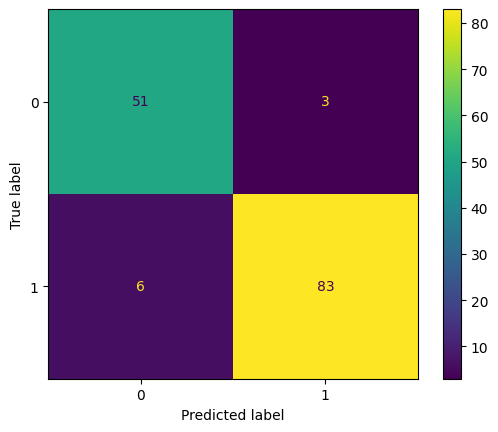

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In the above matrix, we can see that: TP = 83, TN = 51, FP = 3, FN = 6

\begin{aligned}
{\displaystyle \text{Recall}} & ={\displaystyle \frac{\text{TP}}{\text{TP} + \text{FN}}}\\
 & \\
 & {\displaystyle =\frac{\text{83}}{\text{83 + 6}}}\\
 & \\
 & {\displaystyle =\ \frac{\text{83}}{\text{89}}}\\
 & \\
 & {\displaystyle =\ 0.9325}
\end{aligned}